## World Happiness Data Analysis

### Context 
This dataset is obtained from [Kaggle](https://www.kaggle.com/unsdsn/world-happiness). It has been modified to contain only data from 2015 to 2017. This report ranks 155 countries by their happiness level through 6 indicators:

- economic production
- social support
- life expectancy 
- freedom 
- absence of corruption
- generosity

The last indicator is dystopia residual. Dystopia residual is "the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country".  Dystopia is a made up country that has the world's least happiest people. This made up country is high in corruption, low in average income, employment, etc. Dystopia residual is used as a benchmark and should be used side-by-side with the happiness score. 
- Low dystopia residual = low level of happiness 
- high dystopia residual = high level of happiness.

### Column data
- Country
- Happiness rank 
- Happiness score 
 * This is obtained from a sample of population. The survey-taker asked the respondent to rate their happiness from 1 to 10. 
- Economic (GDP per cap)
 * Extend of GDP that contributes to the happiness score
- Family
 * To what extend does family contribute to the happiness score 
- Health
 * Extend of health (life expectancy) contribute to the happiness score 
- Freedom
 * Extend of freedom that contribute to happiness. The freedom here represents the freedom of speech, freedom to pursue what we want, etc
- Trust (Government corruption)
 * Extend of trust with regards to government corruption that contribute to happiness score 
- Generosity 
 * Extend of generosity that contribute to happiness score 
- dystopia residual
- Year

#### Note:
$ Happiness Score = Economic (GDP per cap) + Family + Health + Freedom + Trust + Generosity + Dystopia Residual $


In [30]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
# Import data:

data = pd.read_csv('World_Happiness_2015_2017.csv')

# We then use data.head() to see the first 5 rows of data
data.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [3]:
#How many rows and columns:

data.shape

(470, 11)

In [4]:
# What data types:
data.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                               int64
dtype: object

In [8]:
# null values:
data.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

## Correlation between Happiness score and economic 


- I will look at the correlation coefficient ($R$ and $R^2$) for the following 6 attributes and plot a regression plot for each of them:

1. Family
2. Health
3. Freedom
4. Trust (Government corruption)
5. Generosity
6. Dystopia residual


- I will also create a summary too and describe my undestanding of the data. 

### Prepare required data

Here , I just extracted the required columms to work with:

In [14]:
 happiness_indicators_columns =  ['Happiness Score', 'Family', 'Health (Life Expectancy)', 
                                  'Freedom', 'Trust (Government Corruption)', 'Generosity',
                                  'Dystopia Residual']
happiness_indicators = data[ happiness_indicators_columns]
happiness_indicators.head()

,Happiness Score,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### $R$ score:

Pearson correlation:

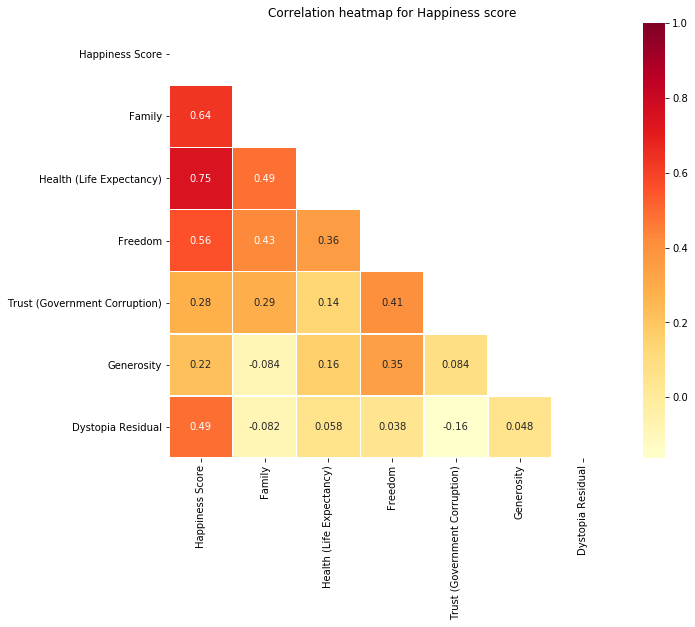

In [116]:
pearson_corr = np.triu(happiness_indicators.corr())
plt.subplots(figsize=(10,8))
ax = plt.axes()
sns.heatmap(happiness_indicators.corr(),
            mask = pearson_corr, cmap='YlOrRd', annot=True,linewidth=0.5, ax = ax)
ax.set_title("Correlation heatmap for Happiness score");

### $R^2$ score:

Here I just squared the correlation coeff, as $R$, to get the $R^2$, the coeff of determination:

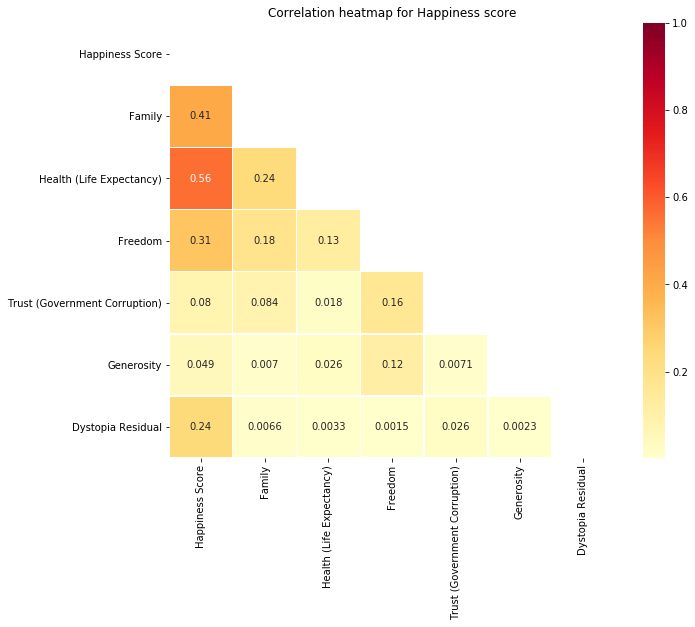

In [124]:
pearson = happiness_indicators.corr()
R2 = pearson**2
plt.subplots(figsize=(10,8))
ax = plt.axes()
sns.heatmap(R2,
            mask = pearson_corr, cmap='YlOrRd', annot=True,linewidth=0.5, ax = ax)
ax.set_title("Correlation heatmap for Happiness score");

### Scatter plots analysis:

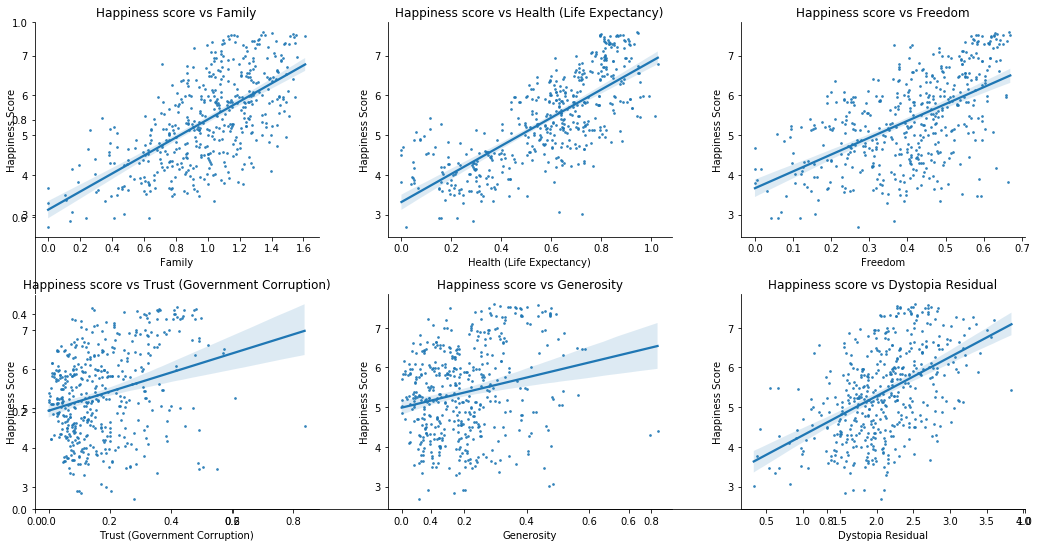

In [72]:
fig, ax1 = plt.subplots(figsize = (15, 8))

for i, col in enumerate(happiness_indicators.columns[1:]):
    ax1=fig.add_subplot(2, 3, i+1)
    sns.regplot(data = happiness_indicators, x = col, y = 'Happiness Score',
              scatter_kws={"s": 3}).set_title("Happiness score vs " + str(col));
    sns.despine()
plt.tight_layout()

### Quick look at the distribution of values for each variable:

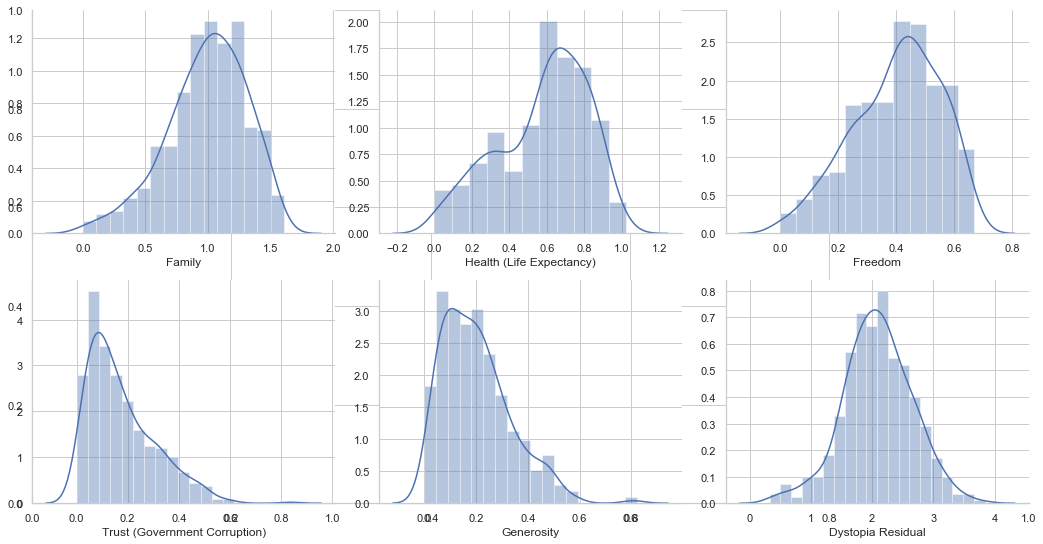

In [138]:
sns.set(style = 'whitegrid')
fig2, ax2 = plt.subplots(figsize = (15, 8))
for i, col in enumerate(happiness_indicators.columns[1:]):
    ax2=fig2.add_subplot(2, 3, i+1)
    x= happiness_indicators[col]
    sns.distplot(x)
    sns.despine()
plt.tight_layout()

From these graphs, I would take into consideration that the majority of responders, were in specific bins:

- Trust and generosity seem to be on the low side in most of the responders;
- Most responders had family level around 1.0, health and life expectancy responders seem to be clustered at 0.6-0.8.
- Most people report their sense of freedom also mostly between values 0.4-0.6;

This information depicts the general tendency of the majority of people surveyed. It may or it may not skew the results.

### General comments:

From looking at these scatter plots individually, I can say there isn't one that can be described as a strong linear relationship between the variables, as they all have some potential outliers, some more than others.

- Health(life expectancy) and happiness have the highest correlation, family comes in second. However, from the R2 scores, we can see that truly the health seems to be the strongest predictor.

- The perception of freedom seems to have a lesser influence than the two variable discussed above, especially when we see the value or R2 being smaller than R. However, from the scatter plot there can be seen some outliers also on the bottom of the graph. Removing the outliers and recalcuating the correlation coefficient may give slightly different results.

- Generosity and Trust have even lower correlation with hapiness, in both R and R2 values. However, when I look at the scatter plots (both of them), there is almost a cluster at lower generosity levels, and multiple outliers in the bottom of the graph. If those outliers are not taken into consideration, the correlation may be a little more significant.

- The Dystopia Residual variable shows that somewhat the happier the people, higher is the score. The correlation coefficient being small, one would say it is not significant, but by looking at  the graph, we do see a positive slope in the regression line. Also, here there are less values in the left bottom corner, and majority of values seem to be clustered in a specific interval. Although that would mean too many values considered as outliers, it seems that a much higher happiness score does not guarantee higher dystopian residual.



### Conclusions/ Analysis:
From these variables, the strongest relationship with happiness seems to be health and life expectancy, although it is not clear which causes the other. It could be healthier people with higher life expectancy are happier, or the reverse as well. There is a growwing body of evidence which is trying to measure the relationship betwwen these two factors, however, it is hard to determine whether happiness causes better health and longer life or vice versa.

### Further considerations:
I would like to know what was the sampling method of the surveyed people, and their ages. It is possible that different generations have different perceptions of what it means to be happy.